# Практическая работа №1: Основы анализа и моделирования социальных сетей

Выполнил студент гр. 3385 Хорчев Глеб. Вариант №16.

## Цель работы

Овладеть навыками работы с математическими пакетами для моделирования, визуализации и анализа социальных сетей.

## Основные теоретические положения

### Меры центральности (Centrality Measures)

#### 1. Центральность по степени (Degree Centrality)

**Исходная формула:**
$$ C_D(n_i) = \sum_{j=1}^{g} x_{ij} $$

**Нормализованная версия:**
$$ C_D'(n_i) = \frac{C_D(n_i)}{g-1} $$

где:
- $x_{ij}$ — элемент социоматрицы (1 если есть связь, 0 если нет)
- $g$ — общее количество вершин в сети

#### 2. Центральность по близости (Closeness Centrality)

**Исходная формула:**
$$ C_C(n_i) = \frac{1}{\sum_{j=1}^{g} d(n_i, n_j)} $$

**Нормализованная версия:**
$$ C_C'(n_i) = \frac{g-1}{\sum_{j=1}^{g} d(n_i, n_j)} $$

где:
- $d(n_i, n_j)$ — длина кратчайшего пути между вершинами $n_i$ и $n_j$

### Меры престижа (Prestige Measures)

#### 1. Престиж по степени (Degree Prestige)

**Исходная формула:**
$$ P_D(n_i) = \sum_{j=1}^{g} x_{ji} $$

**Нормализованная версия:**
$$ P_D'(n_i) = \frac{P_D(n_i)}{g-1} $$

где:
- $x_{ji}$ — входящая связь от $n_j$ к $n_i$

#### 2. Ранговый престиж (Rank Prestige)

**Матричная формула:**
$$ \mathbf{p} = \mathbf{X}^T \mathbf{p} $$

**Решение через собственные векторы:**
$$ \mathbf{p} = \text{eigenvector}(\mathbf{X}^T) $$

где:
- $\mathbf{p}$ — вектор престижа
- $\mathbf{X}$ — стандартизированная социоматрица (суммы столбцов = 1)

### Дополнительные метрики сети

#### Плотность сети (Density)
$$ \Delta = \frac{2L}{g(g-1)} $$
где $L$ — количество рёбер

#### Коэффициент кластеризации (Clustering Coefficient)
$$ C = \frac{3 \times \text{количество треугольников}}{\text{количество связанных троек}} $$

#### Диаметр сети (Diameter)
$$ D = \max  d(n_i, n_j) $$

## Выполнение работы

### Импорт библиотек

In [67]:
library(igraph)
library(statnet)

## Часть 1. Ненаправленная сеть

### 1. Извлечь социоматрицу с помощью соответствующих функций. Вывести полученную социоматрицу на экран.

In [68]:
# Читаем
florentine_material <- read.csv('/home/gleb/Downloads/florentine_marital.csv', skip=1)

# Преобразуем в матицу
matrix <- as.matrix(florentine_material)

# Матрицу в граф
graph <- igraph::graph_from_adjacency_matrix(matrix)

# Граф в социоматрицу
snetwork <- igraph::as_adjacency_matrix(graph)

snetwork

  [[ suppressing 16 column names ‘Acciaiuoli’, ‘Albizzi’, ‘Barbadori’ ... ]]



16 x 16 sparse Matrix of class "dgCMatrix"
                                            
Acciaiuoli   . . . . . . . . 1 . . . . . . .
Albizzi      . . . . . 1 1 . 1 . . . . . . .
Barbadori    . . . . 1 . . . 1 . . . . . . .
Bischeri     . . . . . . 1 . . . 1 . . . 1 .
Castellani   . . 1 . . . . . . . 1 . . . 1 .
Ginori       . 1 . . . . . . . . . . . . . .
Guadagni     . 1 . 1 . . . 1 . . . . . . . 1
Lamberteschi . . . . . . 1 . . . . . . . . .
Medici       1 1 1 . . . . . . . . . 1 1 . 1
Pazzi        . . . . . . . . . . . . . 1 . .
Peruzzi      . . . 1 1 . . . . . . . . . 1 .
Pucci        . . . . . . . . . . . . . . . .
Ridolfi      . . . . . . . . 1 . . . . . 1 1
Salviati     . . . . . . . . 1 1 . . . . . .
Strozzi      . . . 1 1 . . . . . 1 . 1 . . .
Tornabuoni   . . . . . . 1 . 1 . . . 1 . . .

### 2. Преобразовать социоматрицу в список рёбер. Вывести первые 5 элементов списка рёбер.

In [69]:
# Граф в список ребер
edges_list <- igraph::as_edgelist(graph)

# Вывести 5 первых элементов списка ребер
head(edges_list, 5)

Acciaiuoli,Medici
Albizzi,Ginori
Albizzi,Guadagni
Albizzi,Medici
Barbadori,Castellani


### 3. Присвоить имена столбцам и строкам социоматрицы (имена — первая строка в csv-файле после комментариев).

In [70]:
# Присвоить имена столбцам и строкам
vertex_names <- colnames(florentine_material)   
rownames(snetwork) <- vertex_names
colnames(snetwork) <- vertex_names

### 4. С помощью соответствующих функций по полученной социоматрице построить ненаправленную сеть. Объяснить параметры, передаваемые в функцию.

In [77]:
# Постоение ненаправленной сети
# Объяснение параметров
# matrix.type = "adjacency" - тип входной матрицы
# directed = FALSE - ненаправленная сеть
net <- network(matrix, matrix.type = "adjacency", directed = FALSE)

### 5. Отобразить сеть с помощью алгоритмов укладки Фрюхтермана—Рейнгольда и Камада—Каваи. Объяснить, в чём различие между алгоритмами и укладками.

#### Различие между укладками и алгоритмами:

##### Алгоритм Фрюхтермана-Рейнгольда:

    1.Вершины графа помещаются в случайные координаты
    2.Рассчитываются силы, действующие на вершины
    3.Происходит перемещение вершин, проверяется выход за границу экрана
    4.Повторяются шаги 2-3

силы в алгоритме:
    Отталкивание:
    $f_{rep}(u,v) = k² / dist(u,v)$ - между всеми парами вершин
    Притяжение:
    $f_{att}(u,v) = dist(u,v)² / k$ - между смежными
    $k = sqrt(area / n_{vertices})$


##### Алгоритм Камада-Кавай:   

Алгоритм минимизирует энергию системы, где энергия рассчитывается как разница между текущими расстояниями и желаемыми расстояниями между вершинами.

    1.Рассчитываются расстояния по графу между всеми вершинами
    2.Вершины графа помещаются в случайные координаты
    3.Выбирается вершина, на которую действует максимальная сила
    4.Остальные вершины фиксируются, энергия системы минимизируется
    Повторяются шаги 3-4

![image.png](attachment:4038b19d-e6fe-4c0f-9dd9-4a7dae3d77ab.png)
    

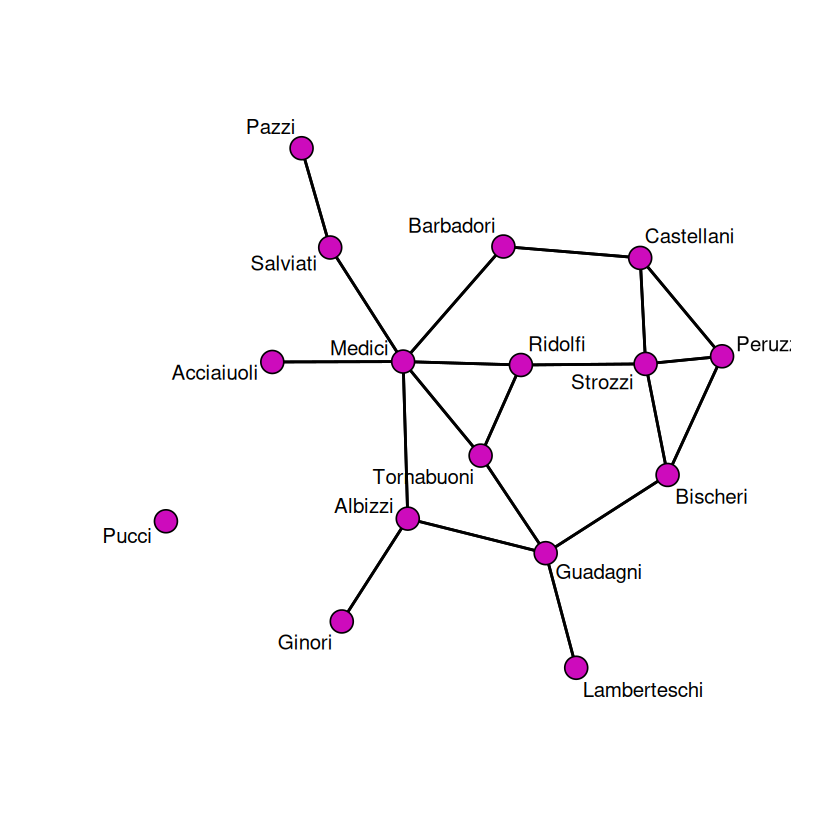

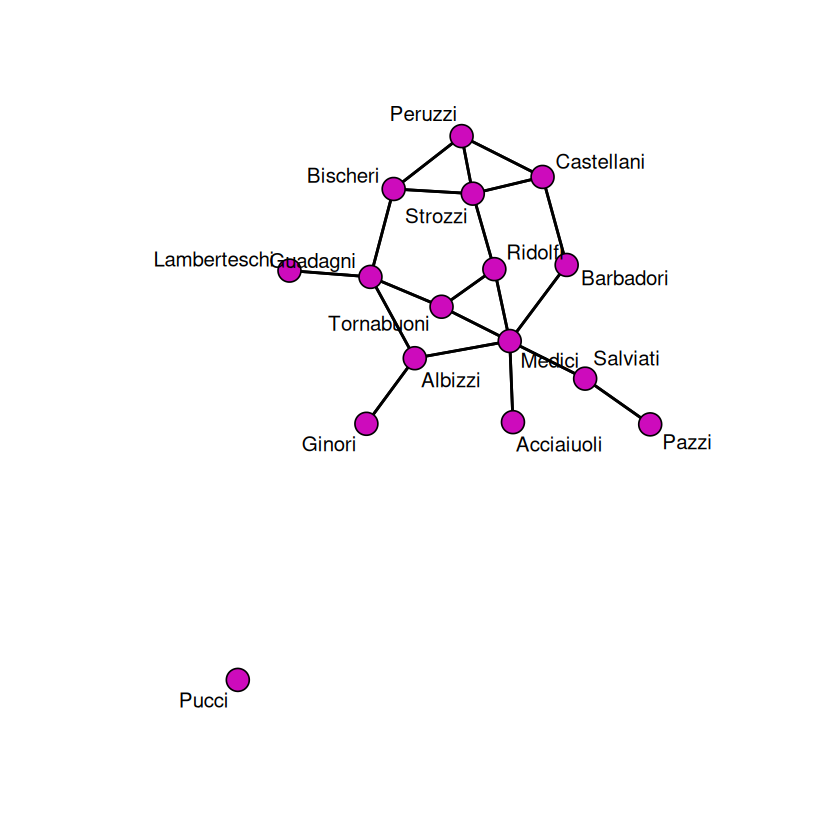

In [78]:
# Отобразить сеть Фрюхтерман—Рейнгольд
gplot(net, gmode = "graph", mode = "fruchtermanreingold", displaylabels = TRUE, vertex.col = 6)

# Отобразить сеть Камада—Каваи
gplot(net,gmode = "graph",mode = "kamadakawai",displaylabels = TRUE,   vertex.col = 6)

### 6. Вывести «описательную сводку» сети.

In [31]:
# Описательная сводка
summary(net)

Network attributes:
  vertices = 16
  directed = FALSE
  hyper = FALSE
  loops = FALSE
  multiple = FALSE
  bipartite = FALSE
 total edges = 20 
   missing edges = 0 
   non-missing edges = 20 
 density = 0.1666667 

Vertex attributes:
  vertex.names:
   character valued attribute
   16 valid vertex names

No edge attributes

Network edgelist matrix:
      [,1] [,2]
 [1,]    9    1
 [2,]    6    2
 [3,]    7    2
 [4,]    9    2
 [5,]    5    3
 [6,]    9    3
 [7,]    7    4
 [8,]   11    4
 [9,]   15    4
[10,]   11    5
[11,]   15    5
[12,]    8    7
[13,]   16    7
[14,]   13    9
[15,]   14    9
[16,]   16    9
[17,]   14   10
[18,]   15   11
[19,]   15   13
[20,]   16   13

### 7. Вычислить «пятичисловую сводку» сети:
(a) Вычислить размер сети.

(b) Вычислить плотность сети вручную и с помощью соответствующей функции. Сделать выводы.

(c) Определить число компонент в сети по графику. Подтвердить
свои догадки с помощью соответствующей функции. Сделать
выводы.

(d) Вычислить диаметр сети. Сделать выводы

(e) Вычислить коэффициент кластеризации. Сделать выводы.

In [140]:
# Пятичисловая сводка сети:

# Создание таблицы
summary_table <- data.frame(
  Размер = size <- network.size(net),
  Плотность = counted_density <- 2*network.edgecount(net) / (size*(size-1)),
  ЧислоКС = components(net),
  диаметр = diameter(graph),
  Кластеризация = gtrans(net, mode = "graph")
)

print(summary_table)

  Размер Плотность ЧислоКС диаметр Кластеризация
1     16 0.1666667       2       5     0.1914894


#### Выводы:

##### **Плотность сети - 0.16**
Сеть довольно разреженая. Это говорит о том, что связи между семьями случались довольно редко.

##### **Число компонент связности - 2**
Одна семья не вступала в контакты с другими.

##### **Диаметр- 5**
Значит, что любые две семьи связаны в "худшем" случае через 3 другие семьи. Кажется, что для компоненты связности из 15 семей это довольно высокий показатель. Интуитивно кажется, что даже связь через 2 другие семьи очень слабая. Такое значение можно было ожидать, учитвая низкую плотность сети.

##### **Коэффициент кластеризации - 0.19**
Среднее значение кластеризации.

### 8. Заполнить таблицу для различных мер центральности. Примечание: меры центральности вычислить для неизолированных вершин:

In [79]:
# Удаление изолированную вершину
iso <- which(degree(net, gmode = "graph") == 0)
net_no_iso <- net
delete.vertices(net_no_iso, iso)

g <- network.size(net_no_iso)

# Расчет мер центральности
family_names <- net_no_iso %v% 'vertex.names'
degree_vals <- round(degree(net_no_iso, gmode = "graph") / (g-1), 2)
closeness_vals <- round(closeness(net_no_iso, gmode = "graph"), 2)
betweenness_vals <- round(betweenness(net_no_iso, gmode = "graph") / ((g-1)*(g-2)/2), 2)
info_vals <- round(infocent(net_no_iso, gmode = "graph") / sum(infocent(net_no_iso, gmode = "graph")), 2)


# Создание таблицы
centrality_table <- data.frame(
  Семья = family_names,
  Степень = degree_vals,
  Близость = closeness_vals,
  Посредничество = betweenness_vals,
  Информация = info_vals
)


print(centrality_table)

          Семья Степень Близость Посредничество Информация
1    Acciaiuoli    0.07     0.37           0.00       0.05
2       Albizzi    0.21     0.48           0.21       0.07
3     Barbadori    0.14     0.44           0.09       0.07
4      Bischeri    0.21     0.40           0.10       0.07
5    Castellani    0.21     0.39           0.05       0.07
6        Ginori    0.07     0.33           0.00       0.04
7      Guadagni    0.29     0.47           0.25       0.08
8  Lamberteschi    0.07     0.33           0.00       0.05
9        Medici    0.43     0.56           0.52       0.10
10        Pazzi    0.07     0.29           0.00       0.04
11      Peruzzi    0.21     0.37           0.02       0.07
12      Ridolfi    0.21     0.50           0.11       0.08
13     Salviati    0.14     0.39           0.14       0.05
14      Strozzi    0.29     0.44           0.10       0.08
15   Tornabuoni    0.21     0.48           0.09       0.08


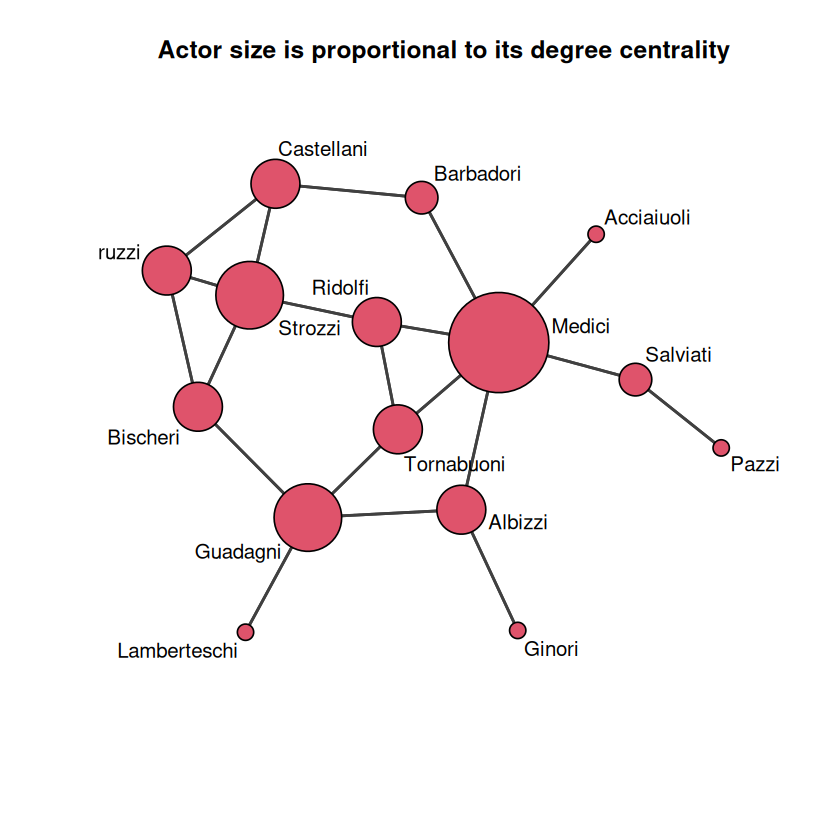

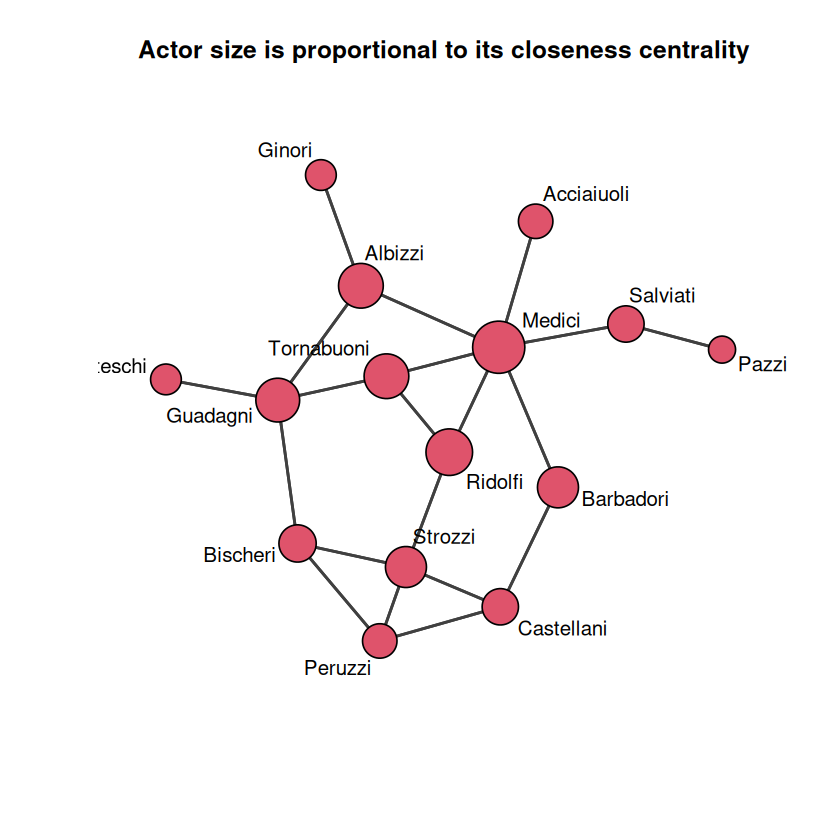

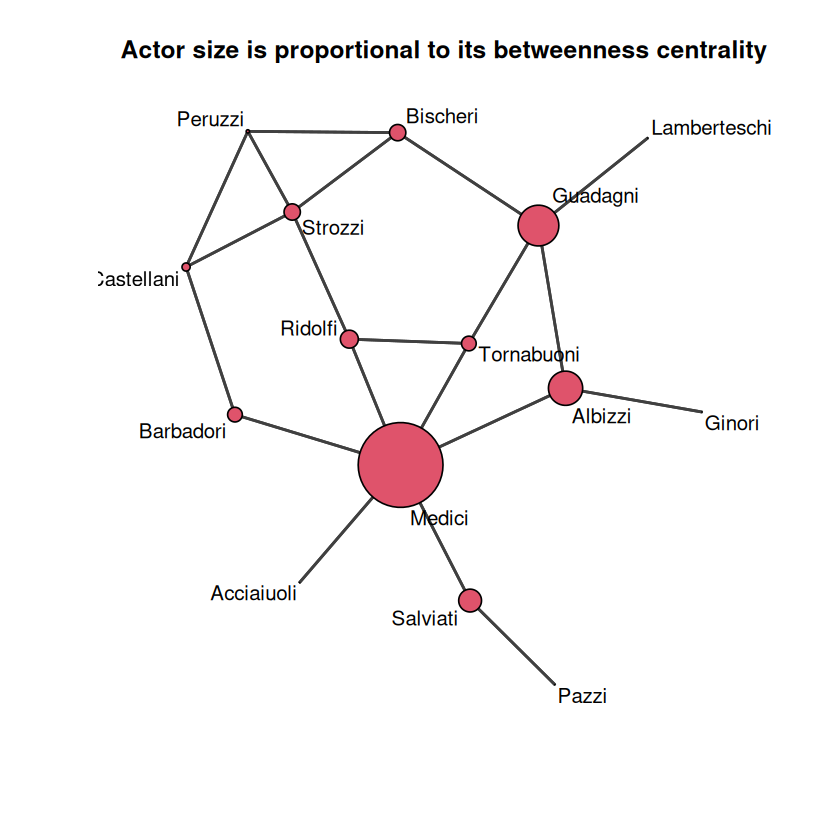

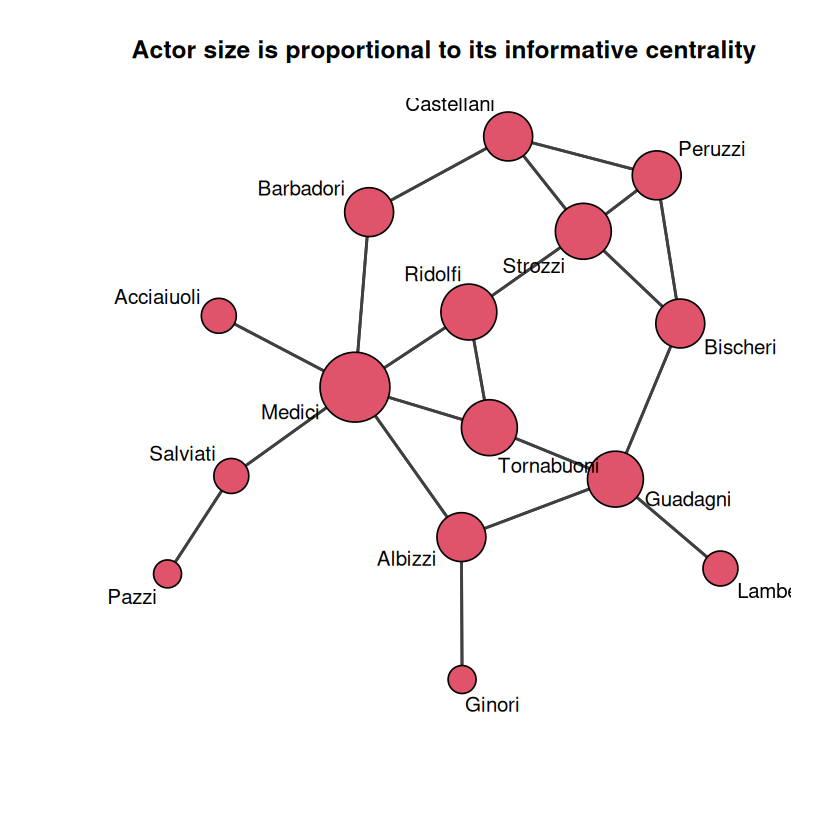

In [80]:

# Визуализация сети. Размер актора пропорционален центральности по степени
gplot(net_no_iso,usearrows=FALSE,displaylabels=TRUE,
vertex.cex=centrality_table$Степень * 10,
edge.lwd=0,edge.col="grey25",
main='Actor size is proportional to its degree centrality')

# Визуализация сети. Размер актора пропорционален центральности по близости
gplot(net_no_iso,usearrows=FALSE,displaylabels=TRUE,
vertex.cex=centrality_table$Близость*4,
edge.lwd=0,edge.col="grey25",
main='Actor size is proportional to its closeness centrality')

gplot(net_no_iso,usearrows=FALSE,displaylabels=TRUE,
vertex.cex=centrality_table$Посредничество*7,
edge.lwd=0,edge.col="grey25",
     main='Actor size is proportional to its betweenness centrality')

gplot(net_no_iso,usearrows=FALSE,displaylabels=TRUE,
vertex.cex=centrality_table$Информация*30,
edge.lwd=0,edge.col="grey25",
     main='Actor size is proportional to its informative centrality')

#### Выводы:

##### **По степени**
Медичи - самая влиятельная семья. Разница с другими семьями довольно существенная

##### **По близости**
Медичи - семья с наибольшем показателем. Однако, разница с другими семьями не столько разительная. Это значит, что сеть относительно равномерно нагружена. Акторы примерно одинакого разделяют передачу информации по близости.

##### **По посредничеству**
Медичи - семья с наибольшем показателем. Это связано с тем, что целых 3 семьи связаны с основой сетью через "Медичей". Остальные семьи имеют куда меньший вес.

##### **По информации**
Равномерное распределение.

##### **Общий вывод**
Сеть довольно равномерна. Несмотря на это, можно выделить семью с наибольшим влиянием - Медичи. Это связвно в первую очередь с тем, что 3 семьи имеют доступ к сети только через семью Медичей.

## Часть 2. Направленная сеть

### 1. Извлечь социоматрицу с помощью соответствующих функций. Вывести полученную социоматрицу на экран.

In [85]:
# Читаем
krackhardt <- read.csv('/home/gleb/Downloads/krackhardt_advice.csv', header=FALSE, skip=2)

# Преобразуем в матицу
matrix2 <- as.matrix(krackhardt)

# Матрицу в граф
graph2 <- igraph::graph_from_adjacency_matrix(matrix2)

# Граф в социоматрицу
snetwork2 <- igraph::as_adjacency_matrix(graph2)

snetwork2

  [[ suppressing 21 column names ‘V1’, ‘V2’, ‘V3’ ... ]]



21 x 21 sparse Matrix of class "dgCMatrix"
                                             
V1  . 1 . 1 . . . 1 . . . . . . . 1 . 1 . . 1
V2  . . . . . 1 1 . . . . . . . . . . . . . 1
V3  1 1 . 1 . 1 1 1 1 1 1 1 . 1 . . 1 1 . 1 1
V4  1 1 . . . 1 . 1 . 1 1 1 . . . 1 1 1 . 1 1
V5  1 1 . . . 1 1 1 . 1 1 . 1 1 . 1 1 1 1 1 1
V6  . . . . . . . . . . . . . . . . . . . . 1
V7  . 1 . . . 1 . . . . 1 1 . 1 . . 1 1 . . 1
V8  . 1 . 1 . 1 1 . . 1 1 . . . . . . 1 . . 1
V9  1 1 . . . 1 1 1 . 1 1 1 . 1 . 1 1 1 . . 1
V10 1 1 1 1 1 . . 1 . . 1 . 1 . 1 1 1 1 1 1 .
V11 1 1 . . . . 1 . . . . . . . . . . . . . .
V12 . . . . . . 1 . . . . . . . . . . . . . 1
V13 1 1 . . 1 . . . 1 . . . . 1 . . . 1 . . .
V14 . 1 . . . . 1 . . . . . . . . . . 1 . . 1
V15 1 1 1 1 1 1 1 1 1 1 1 1 1 1 . 1 1 1 1 1 1
V16 1 1 . . . . . . . 1 . . . . . . . 1 . . .
V17 1 1 . 1 . . 1 . . . . . . . . . . . . . 1
V18 1 1 1 1 1 . 1 1 1 1 1 . 1 1 1 1 . . 1 1 1
V19 1 1 1 . 1 . 1 . . 1 1 . . 1 1 . . 1 . 1 .
V20 1 1 . . . 1 . 1 . . 1 1 . 1 1 1 1

### 2. Преобразовать социоматрицу в список рёбер. Вывести первые 5 элементов списка рёбер.

In [86]:
# Граф в список ребер
edges_list2 <- igraph::as_edgelist(graph2)

# Вывести 5 первых элементов списка ребер
head(edges_list2, 5)

V1,V2
V1,V4
V1,V8
V1,V16
V1,V18


### 3. Присвоить имена столбцам и строкам социоматрицы (имена — первая строка в csv-файле после комментариев).

In [88]:
vertex_names2 <- c(
  "Alice", "Bob", "Carol", "David", "Eve", "Frank", "Grace",
  "Hank", "Ivy", "Jack", "Kathy", "Leo", "Mona", "Nina",
  "Oscar", "Paul", "Quinn", "Rita", "Steve", "Tracy", "Uma"
)
rownames(snetwork2) <- vertex_names2
colnames(snetwork2) <- vertex_names2

snetwork2

  [[ suppressing 21 column names ‘Alice’, ‘Bob’, ‘Carol’ ... ]]



21 x 21 sparse Matrix of class "dgCMatrix"
                                               
Alice . 1 . 1 . . . 1 . . . . . . . 1 . 1 . . 1
Bob   . . . . . 1 1 . . . . . . . . . . . . . 1
Carol 1 1 . 1 . 1 1 1 1 1 1 1 . 1 . . 1 1 . 1 1
David 1 1 . . . 1 . 1 . 1 1 1 . . . 1 1 1 . 1 1
Eve   1 1 . . . 1 1 1 . 1 1 . 1 1 . 1 1 1 1 1 1
Frank . . . . . . . . . . . . . . . . . . . . 1
Grace . 1 . . . 1 . . . . 1 1 . 1 . . 1 1 . . 1
Hank  . 1 . 1 . 1 1 . . 1 1 . . . . . . 1 . . 1
Ivy   1 1 . . . 1 1 1 . 1 1 1 . 1 . 1 1 1 . . 1
Jack  1 1 1 1 1 . . 1 . . 1 . 1 . 1 1 1 1 1 1 .
Kathy 1 1 . . . . 1 . . . . . . . . . . . . . .
Leo   . . . . . . 1 . . . . . . . . . . . . . 1
Mona  1 1 . . 1 . . . 1 . . . . 1 . . . 1 . . .
Nina  . 1 . . . . 1 . . . . . . . . . . 1 . . 1
Oscar 1 1 1 1 1 1 1 1 1 1 1 1 1 1 . 1 1 1 1 1 1
Paul  1 1 . . . . . . . 1 . . . . . . . 1 . . .
Quinn 1 1 . 1 . . 1 . . . . . . . . . . . . . 1
Rita  1 1 1 1 1 . 1 1 1 1 1 . 1 1 1 1 . . 1 1 1
Steve 1 1 1 . 1 . 1 . . 1 1 . . 1 1 . . 1 . 1

### 4. С помощью соответствующих функций по полученной социоматрице построить ненаправленную сеть. Объяснить параметры, передаваемые в функцию.

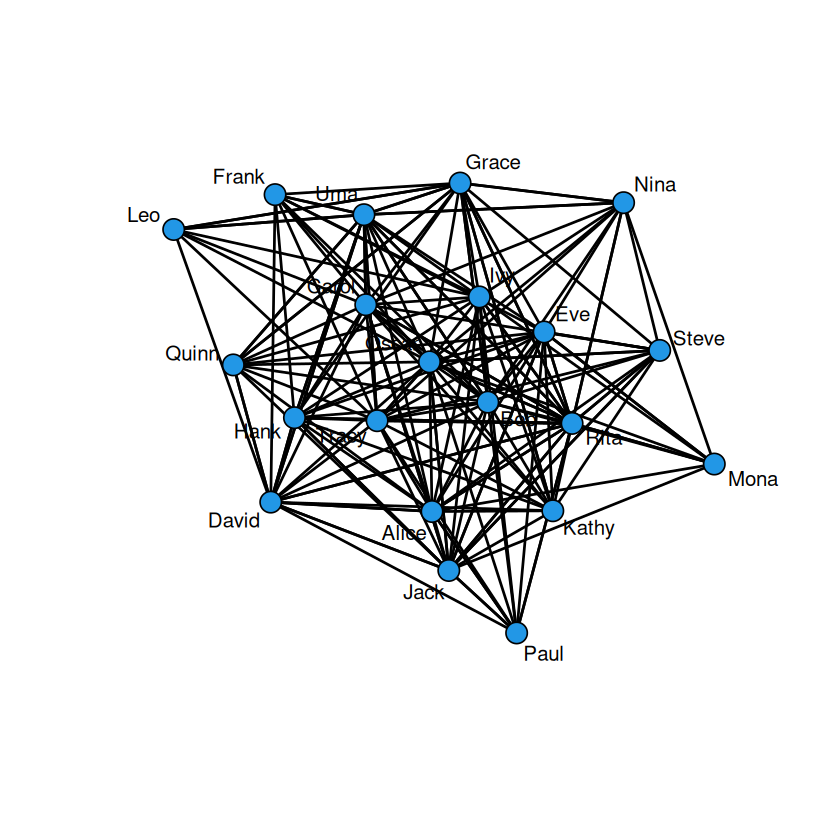

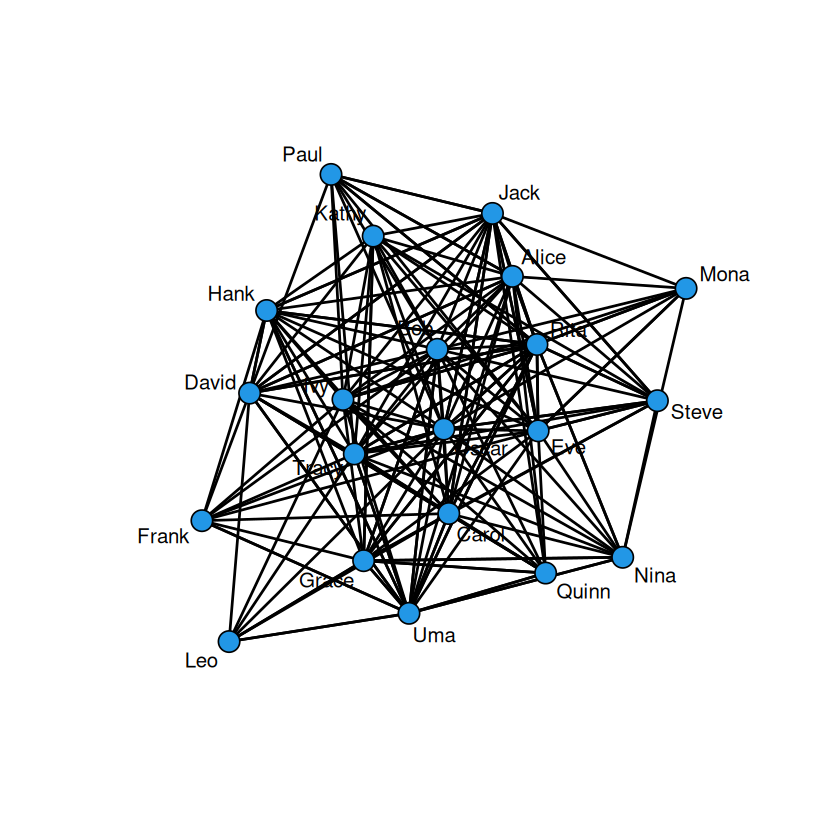

In [120]:
# Постоение направленной сети
# Объяснение параметров
# matrix.type = "adjacency" - тип входной матрицы
# directed = TRUE - направленная сеть
net2 <- network(snetwork2, matrix.type = "adjacency", directed = TRUE)

# Отобразить сеть Фрюхтерман—Рейнгольд
gplot(net2, gmode = "graph", mode = "fruchtermanreingold", displaylabels = TRUE, vertex.col = 20)

# Отобразить сеть Камада—Каваи
gplot(net2,gmode = "graph",mode = "kamadakawai",displaylabels = TRUE,   vertex.col = 20)

### 6. Вывести «описательную сводку» сети.

In [17]:
summary(net2)

Network attributes:
  vertices = 21
  directed = TRUE
  hyper = FALSE
  loops = FALSE
  multiple = FALSE
  bipartite = FALSE
 total edges = 190 
   missing edges = 0 
   non-missing edges = 190 
 density = 0.452381 

Vertex attributes:
  vertex.names:
   character valued attribute
   21 valid vertex names

No edge attributes

Network edgelist matrix:
       [,1] [,2]
  [1,]    3    1
  [2,]    4    1
  [3,]    5    1
  [4,]    9    1
  [5,]   10    1
  [6,]   11    1
  [7,]   13    1
  [8,]   15    1
  [9,]   16    1
 [10,]   17    1
 [11,]   18    1
 [12,]   19    1
 [13,]   20    1
 [14,]    1    2
 [15,]    3    2
 [16,]    4    2
 [17,]    5    2
 [18,]    7    2
 [19,]    8    2
 [20,]    9    2
 [21,]   10    2
 [22,]   11    2
 [23,]   13    2
 [24,]   14    2
 [25,]   15    2
 [26,]   16    2
 [27,]   17    2
 [28,]   18    2
 [29,]   19    2
 [30,]   20    2
 [31,]   21    2
 [32,]   10    3
 [33,]   15    3
 [34,]   18    3
 [35,]   19    3
 [36,]   21    3
 [37,]    1    4
 

### 7. Вычислить «пятичисловую сводку» сети:
(a) Вычислить размер сети.

(b) Вычислить плотность сети вручную и с помощью соответствующей функции. Сделать выводы.

(c) Определить число компонент в сети по графику. Подтвердить
свои догадки с помощью соответствующей функции. Сделать
выводы.

(d) Вычислить диаметр сети. Сделать выводы

(e) Вычислить коэффициент кластеризации. Сделать выводы.

In [117]:
# Пятичисловая сводка сети:

size <-network.size(net2)

components <- clusters(graph2, mode='strong')

components_num <- length(components$no)

largest_component <- largest_component(graph2, mode='strong')
diameter <- diameter(largest_component, directed=TRUE)

# Создание таблицы
summary_table2 <- data.frame(
  Размер = size,
  Плотность = round(counted_density <- 2*network.edgecount(net2) / (size*(size-1)), 2),
  диаметр = diameter,
  components_num,
  Кластеризация = round(gtrans(net2, mode = "graph"), 2)
)

print(summary_table2)

  Размер Плотность диаметр components_num Кластеризация
1     21       0.9       3              1          0.66


#### Выводы:

##### **Плотность сети - 0.9**
Сеть очень плотная. Это говорит о том, что менеджеры активно контактируют друг с другом.

##### **Число компонент сильной связности - 1**
Все менеджеры коммуницируют друг с другом

##### **Диаметр- 3**
Значит, что любые две семьи связаны в "худшем" случае через 2 другие семьи. Для сети из 21 актора очень низкое значение. Оно снова указывает на высокую коммуникабельность

##### **Коэффициент кластеризации - 0.66**
Довольно высокая кластеризация

### 8. Заполнить таблицу для различных мер престижа:

In [118]:
# Расчет престижа
g <- network.size(net2)

names <- net2 %v% 'vertex.names'
degree_vals2 <- degree(net2, cmode = "indegree") / (g-1)

# Близость для входяших связей
closeness_in <- igraph::closeness(graph2, mode = "in", normalized = FALSE)
# Число вершин, из которых "видно" i
I_i <- colSums(igraph::distances(graph2, mode = "in") > 0)
# Престиж по близости
Pp_ni_norm <- round((I_i^2 / (g - 1)) * closeness_in, 2)

# Престиж по Кацу

X <- as.matrix(as_adjacency_matrix(graph2))
lambda_max <- max(Re(eigen(X)$values))
alpha <- 0.8 / lambda_max
I <- diag(nrow(X))
katz_prestige <- solve(I - alpha * t(X)) %*% rowSums(X)


# Создание таблицы
centrality_table <- data.frame(
  Менеджер = names,
  Степень = degree_vals2,
  Близость = Pp_ni_norm,
  По_Кацу = round(katz_prestige, 2)
)


print(centrality_table)

    Менеджер Степень Близость По_Кацу
V1     Alice    0.65     0.67   74.51
V2       Bob    0.90     0.91  110.34
V3     Carol    0.25     0.56   49.02
V4     David    0.40     0.62   67.10
V5       Eve    0.25     0.50   41.71
V6     Frank    0.50     0.67   66.36
V7     Grace    0.65     0.74   88.29
V8      Hank    0.50     0.67   70.45
V9       Ivy    0.20     0.49   35.00
V10     Jack    0.45     0.57   62.24
V11    Kathy    0.55     0.67   66.79
V12      Leo    0.35     0.59   45.80
V13     Mona    0.20     0.49   30.38
V14     Nina    0.50     0.67   61.62
V15    Oscar    0.20     0.49   45.32
V16     Paul    0.40     0.57   51.44
V17    Quinn    0.45     0.65   58.87
V18     Rita    0.75     0.80  102.25
V19    Steve    0.20     0.49   35.38
V20    Tracy    0.40     0.61   61.32
V21      Uma    0.75     0.80  105.79


#### Выводы:

##### **По степени**
Bob, Rita и Uma выделяются на фоне остальных менеджеров.

##### **По близости**
Bob, Rita и Uma выделяются снова имеют наибольшие коэффициенты. Это значит, что они не просто связывают большое количетсво акторов, но также эти связи являются короткими.

##### **По посредничеству**
Bob, Rita и Uma самые влиятельные и по Кацу. Значит, они ключевые для сети.

##### **Общий вывод**
Высокая плотность сети обеспечена тремя менеджерами, которые связывают остальных акторов.

##  Общий вывод
С библиотек statnet, igraph провести анализ заданных социальных сетей, вычислены описательные характеристики